# AI Engineer Track Challenge - Digital Product School
## Devansh Srivastav

###### Importing Libraries

In [140]:
import pandas as pd
import numpy as np
from pycaret.regression import *
from IPython.display import Image

##### Importing Dataset and Preparing Data

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset.head(20)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN
5,Alkoholunfälle,insgesamt,2021,202106,NaN,49.0,NaN,NaN,NaN
6,Alkoholunfälle,insgesamt,2021,202107,NaN,58.0,NaN,NaN,NaN
7,Alkoholunfälle,insgesamt,2021,202108,NaN,46.0,NaN,NaN,NaN
8,Alkoholunfälle,insgesamt,2021,202109,NaN,46.0,NaN,NaN,NaN
9,Alkoholunfälle,insgesamt,2021,202110,NaN,34.0,NaN,NaN,NaN


In [4]:
dataset.describe()

,JAHR,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,1995.000000,1911.000000,1904.000000,1756.000000,1819.000000,1764.000000
mean,2010.463158,1440.540031,1414.205357,5.023069,1.846036,781.194444
std,6.326381,4655.514611,4580.099103,40.239583,30.165304,1170.929940
min,2000.000000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2005.000000,41.000000,41.000000,-15.122500,-12.500000,41.000000
50%,2010.000000,399.000000,396.500000,0.000000,-1.240000,422.000000
75%,2016.000000,864.000000,861.750000,18.370000,10.095000,820.000000
max,2021.000000,46988.000000,46988.000000,600.000000,425.000000,3977.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      1995 non-null   object 
 1   AUSPRAEGUNG                     1995 non-null   object 
 2   JAHR                            1995 non-null   int64  
 3   MONAT                           1995 non-null   object 
 4   WERT                            1911 non-null   float64
 5   VORJAHRESWERT                   1904 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1756 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1819 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1764 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 140.4+ KB


In [6]:
dataset.shape

(1995, 9)

In [7]:
dataset.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [8]:
dataset.shape

(1995, 9)

In [9]:
data = dataset.iloc[:,:5]

In [10]:
list(data['MONATSZAHL'].value_counts().index)

['Verkehrsunfälle', 'Fluchtunfälle', 'Alkoholunfälle']

In [11]:
list(data['AUSPRAEGUNG'].value_counts().index)

['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden']

In [12]:
data.MONAT.dtype

dtype('O')

In [13]:
data = data[data.MONAT != 'Summe']

In [14]:
data.shape

(1848, 5)

In [19]:
data.MONAT = data.MONAT.str[4:]

In [21]:
data.head(5)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,01,NaN
1,Alkoholunfälle,insgesamt,2021,02,NaN
2,Alkoholunfälle,insgesamt,2021,03,NaN
3,Alkoholunfälle,insgesamt,2021,04,NaN
4,Alkoholunfälle,insgesamt,2021,05,NaN


In [22]:
data_2021 = data[data.JAHR == 2021]

In [24]:
data_2021.shape

(84, 5)

In [25]:
data = data[data.JAHR != 2021]

In [26]:
data.shape

(1764, 5)

In [30]:
accidents_per_category = dict()
for category in list(data['MONATSZAHL'].value_counts().index):
    accidents_per_category[category] = data.loc[data['MONATSZAHL'] == category, 'WERT'].sum()

In [31]:
accidents_per_category

{'Verkehrsunfälle': 1127266.0,
 'Fluchtunfälle': 232928.0,
 'Alkoholunfälle': 16242.0}

# MISSION 1 - Visualisations

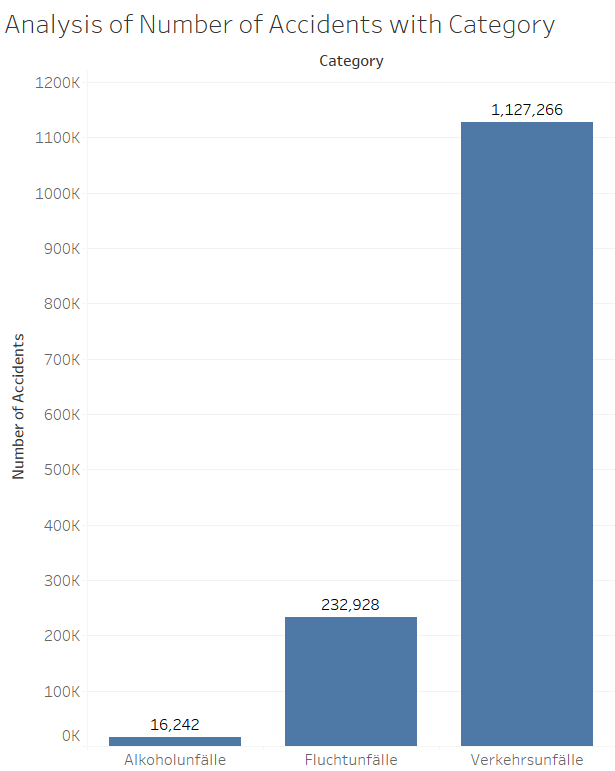

In [141]:
Image(filename='visualisations/no_of_acc_vs_cat.png')

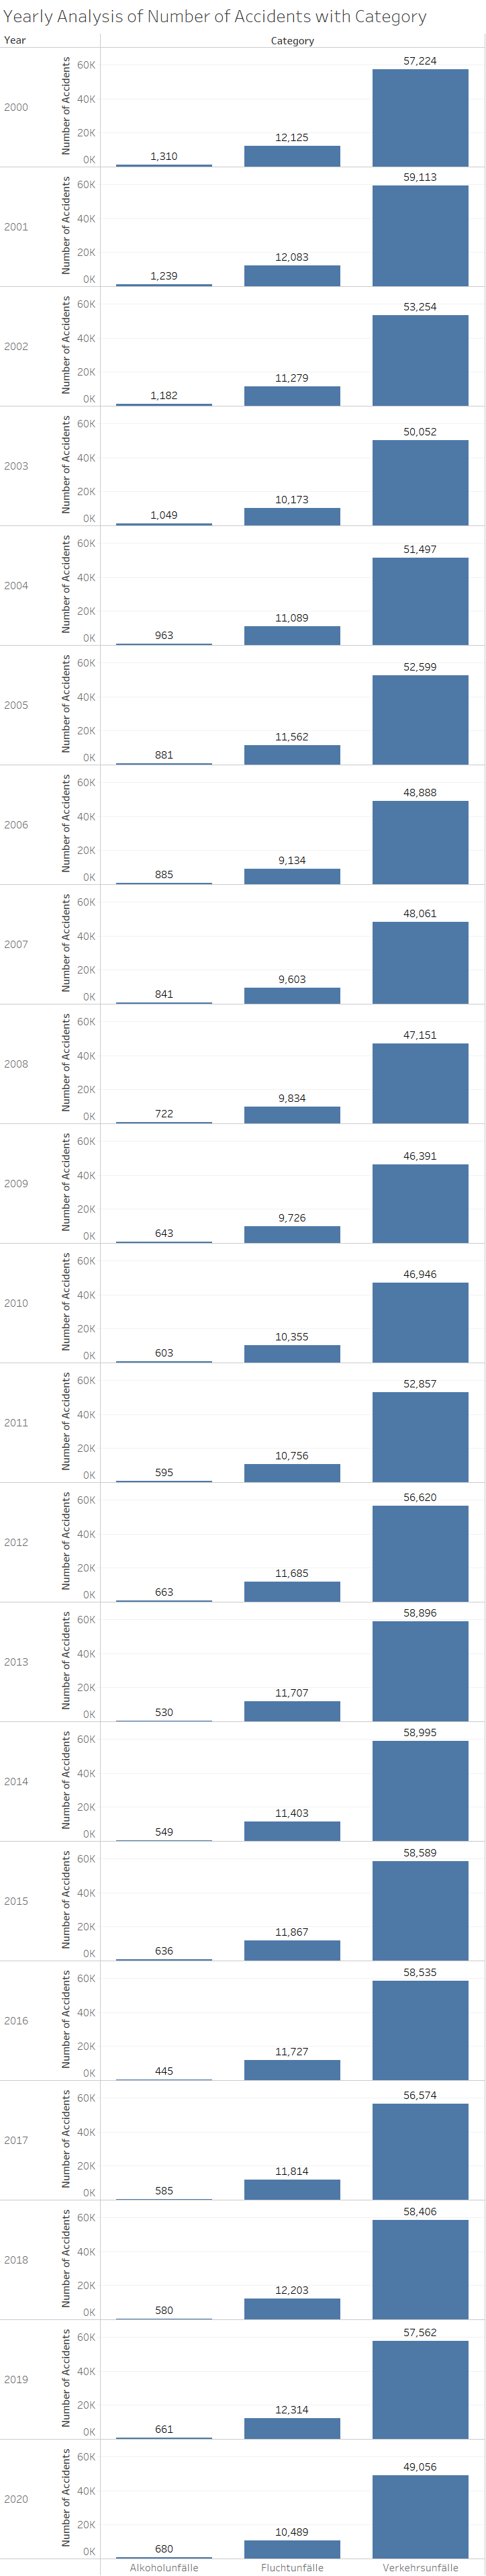

In [142]:
Image(filename='visualisations/yearly_no_of_acc_vs_cat.png')

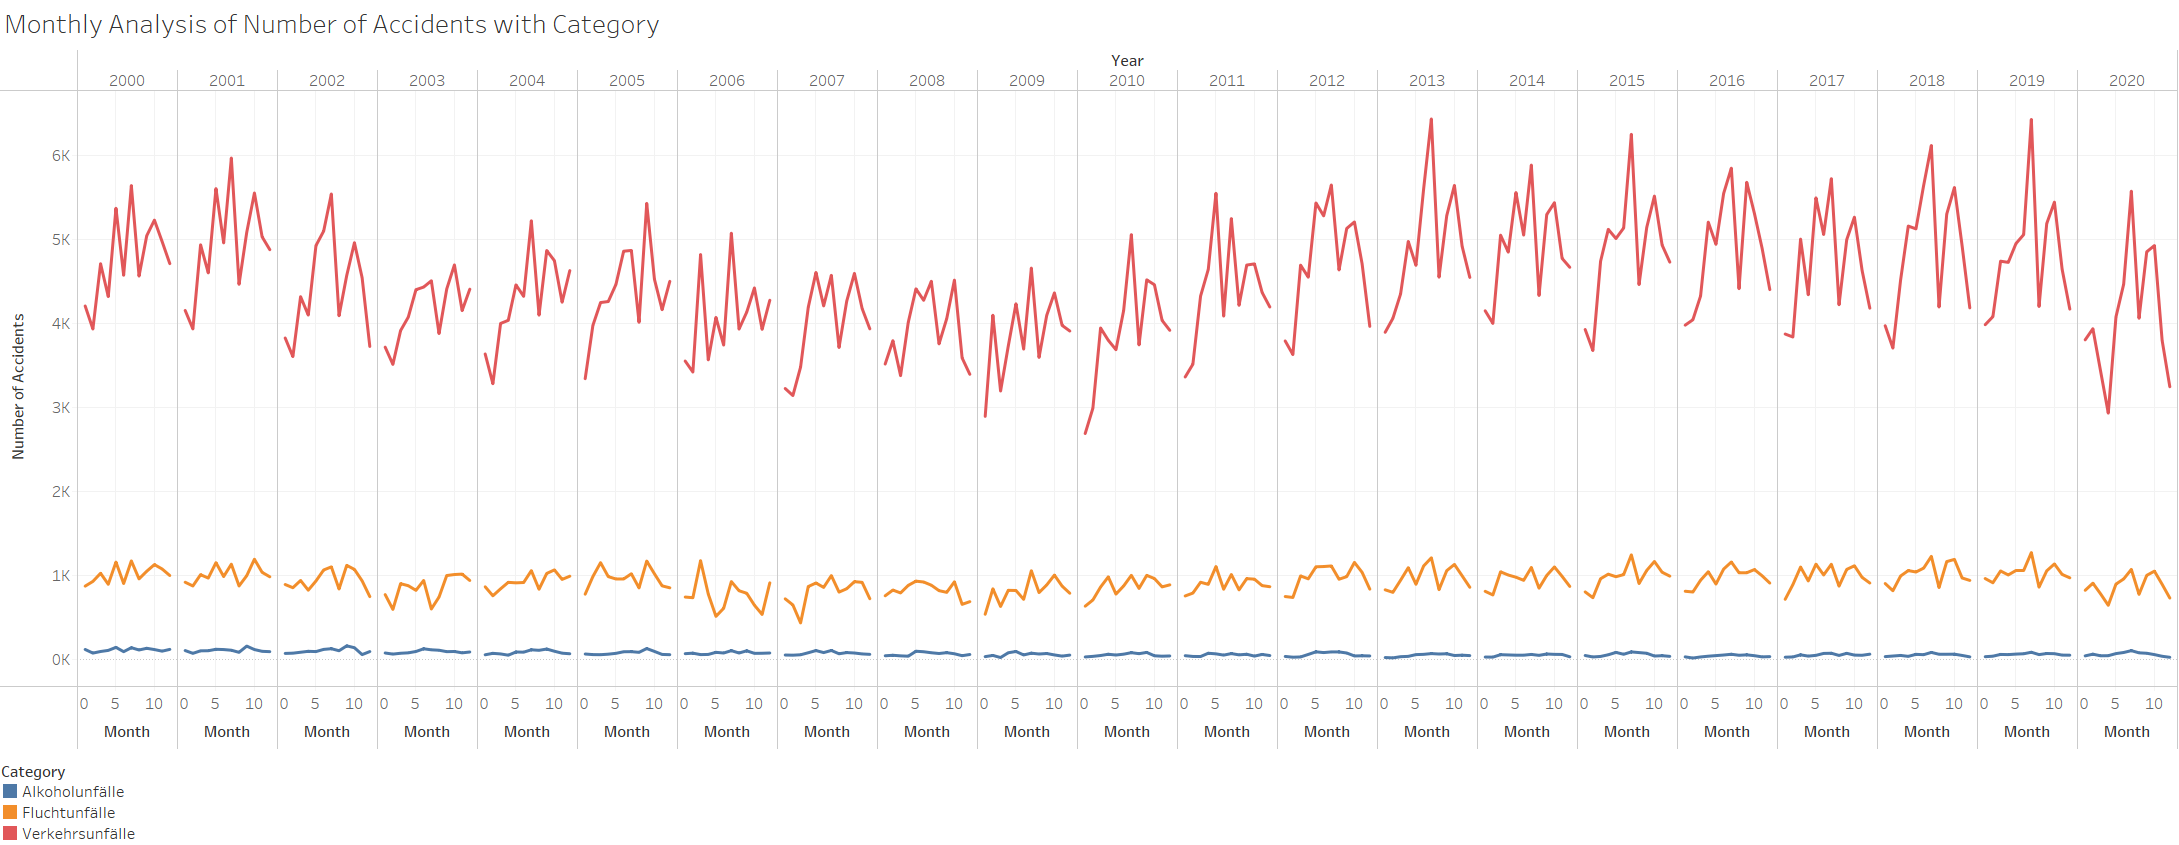

In [143]:
Image(filename='visualisations/monthly_no_of_acc_vs_cat.png')

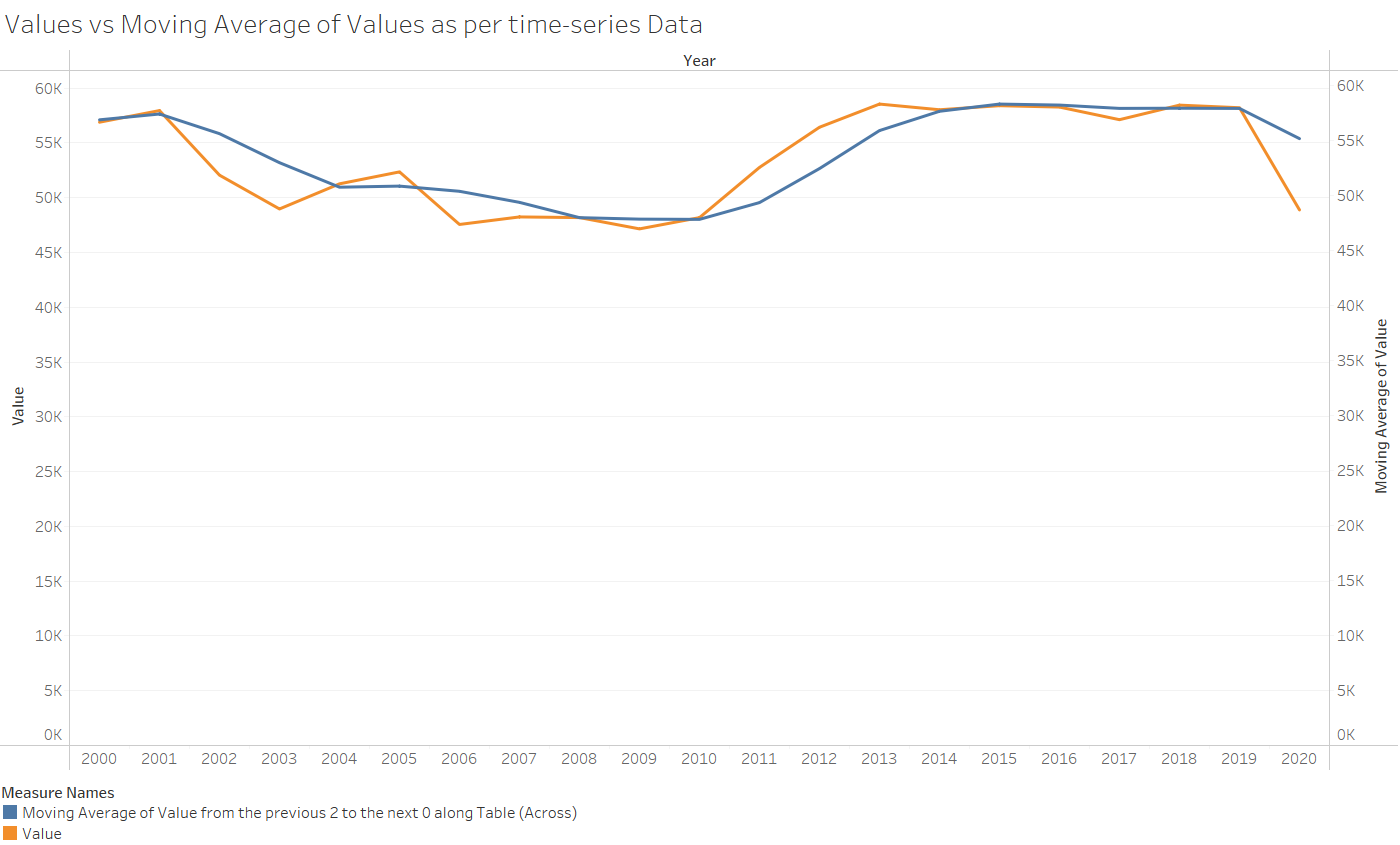

In [144]:
Image(filename='visualisations/value_vs_movingAVG.png')

In [42]:
#data.to_csv('data.csv', index=False)

In [43]:
#data_2021.to_csv('data_2021.csv', index=False)

In [54]:
final_data = data[data.AUSPRAEGUNG == 'insgesamt']

In [56]:
final_data.shape

(756, 5)

In [70]:
data_A = final_data[final_data['MONATSZAHL']=='Alkoholunfälle'].iloc[:,2:]

In [71]:
data_A

,JAHR,MONAT,WERT
13,2020,01,28.0
14,2020,02,40.0
15,2020,03,27.0
16,2020,04,26.0
17,2020,05,40.0
...,...,...,...
280,2000,08,77.0
281,2000,09,84.0
282,2000,10,83.0
283,2000,11,71.0


In [73]:
train_A = data_A[data_A['JAHR'] < 2018]
test_A = data_A[data_A['JAHR'] >= 2018]

In [74]:
data_A = data_A.astype({"MONAT": int})

In [75]:
data_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 13 to 284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAHR    252 non-null    int64  
 1   MONAT   252 non-null    int32  
 2   WERT    252 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 6.9 KB


In [77]:
s = setup(data = train_A, test_data = test_A, target = 'WERT', fold_strategy = 'timeseries', numeric_features = ['JAHR', 'MONAT'], fold = 3, transform_target = True)

,Description,Value
0,session_id,4762
1,Target,WERT
2,Original Data,"(216, 3)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(216, 2)"


In [78]:
models_A = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,12.4990,255.8794,15.5638,-0.6731,0.3097,0.2321,2.5767
lar,Least Angle Regression,12.4991,255.8814,15.5639,-0.6731,0.3097,0.2321,0.7200
ridge,Ridge Regression,12.5014,255.9849,15.5664,-0.6737,0.3098,0.2322,0.7100
ada,AdaBoost Regressor,12.5535,263.8676,15.2161,-0.6052,0.3196,0.2336,0.0233
br,Bayesian Ridge,12.6751,263.1383,15.7569,-0.7186,0.3139,0.2348,0.0100
rf,Random Forest Regressor,12.7037,254.5285,15.1850,-0.5893,0.3261,0.2412,0.1767
gbr,Gradient Boosting Regressor,12.7166,251.3844,15.1123,-0.5826,0.3285,0.2436,0.0167
knn,K Neighbors Regressor,12.7484,266.3666,15.5652,-0.6579,0.3138,0.2339,0.0467
et,Extra Trees Regressor,12.8139,260.4679,15.4611,-0.6737,0.3519,0.2472,0.1733
catboost,CatBoost Regressor,12.8199,260.5805,15.4029,-0.6498,0.3421,0.2460,0.2467


In [79]:
prediction_on_test_A = predict_model(models_A)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,14.4203,283.4675,16.8365,-1.8828,0.5353,0.3858


In [81]:
predictions_A = predict_model(models_A, data=data_A)

In [85]:
predictions_A.to_csv('a.csv', index=False)

In [97]:
mission_1_prediction = predict_model(models_A, data=data_2021[data_2021['MONATSZAHL']=='Alkoholunfälle'][data_2021['AUSPRAEGUNG']=='insgesamt'])

In [98]:
mission_1_prediction

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,Label
0,Alkoholunfälle,insgesamt,2021,01,NaN,15.380601
1,Alkoholunfälle,insgesamt,2021,02,NaN,15.937174
2,Alkoholunfälle,insgesamt,2021,03,NaN,16.509130
3,Alkoholunfälle,insgesamt,2021,04,NaN,17.096767
4,Alkoholunfälle,insgesamt,2021,05,NaN,17.700108
5,Alkoholunfälle,insgesamt,2021,06,NaN,18.319996
6,Alkoholunfälle,insgesamt,2021,07,NaN,18.956472
7,Alkoholunfälle,insgesamt,2021,08,NaN,19.609844
8,Alkoholunfälle,insgesamt,2021,09,NaN,20.280418
9,Alkoholunfälle,insgesamt,2021,10,NaN,20.968515


# MISSION 1 - Prediction for Category: 'Alkoholunfälle', Type: 'insgesamt', Year: '2021', Month: '01'


# Predicted Value = 15

In [99]:
mission_1_prediction.iloc[0,:]

MONATSZAHL     Alkoholunfälle
AUSPRAEGUNG         insgesamt
JAHR                     2021
MONAT                      01
WERT                      NaN
Label               15.380601
Name: 0, dtype: object

# Final Model Training

In [101]:
data_final_model = data[data['AUSPRAEGUNG']=='insgesamt']

In [102]:
data_final_model

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
13,Alkoholunfälle,insgesamt,2020,01,28.0
14,Alkoholunfälle,insgesamt,2020,02,40.0
15,Alkoholunfälle,insgesamt,2020,03,27.0
16,Alkoholunfälle,insgesamt,2020,04,26.0
17,Alkoholunfälle,insgesamt,2020,05,40.0
...,...,...,...,...,...
1420,Verkehrsunfälle,insgesamt,2000,08,3387.0
1421,Verkehrsunfälle,insgesamt,2000,09,3807.0
1422,Verkehrsunfälle,insgesamt,2000,10,4117.0
1423,Verkehrsunfälle,insgesamt,2000,11,3931.0


In [105]:
data_final_model.loc[(data_final_model['JAHR'] == 2020) & (data_final_model['MONAT'] == '01'), 'WERT'].sum()

3958.0

In [107]:
data_final_model['Sum'] = data_final_model.groupby(['JAHR', 'MONAT'])['WERT'].transform('sum')

In [108]:
data_final_model

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,Sum
13,Alkoholunfälle,insgesamt,2020,01,28.0,3958.0
14,Alkoholunfälle,insgesamt,2020,02,40.0,4181.0
15,Alkoholunfälle,insgesamt,2020,03,27.0,3596.0
16,Alkoholunfälle,insgesamt,2020,04,26.0,2884.0
17,Alkoholunfälle,insgesamt,2020,05,40.0,4092.0
...,...,...,...,...,...,...
1420,Verkehrsunfälle,insgesamt,2000,08,3387.0,4345.0
1421,Verkehrsunfälle,insgesamt,2000,09,3807.0,4869.0
1422,Verkehrsunfälle,insgesamt,2000,10,4117.0,5278.0
1423,Verkehrsunfälle,insgesamt,2000,11,3931.0,5019.0


In [109]:
data_final_model = data_final_model.drop_duplicates(subset=['JAHR', 'MONAT'])

In [111]:
data_final_model=data_final_model.drop('WERT', 1)

In [115]:
data_final_model = data_final_model.iloc[:,2:]

In [116]:
data_final_model

,JAHR,MONAT,Sum
13,2020,01,3958.0
14,2020,02,4181.0
15,2020,03,3596.0
16,2020,04,2884.0
17,2020,05,4092.0
...,...,...,...
280,2000,08,4345.0
281,2000,09,4869.0
282,2000,10,5278.0
283,2000,11,5019.0


In [117]:
train = data_final_model[data_final_model['JAHR'] < 2018]
test = data_final_model[data_final_model['JAHR'] >= 2018]

In [118]:
data_final_model = data_final_model.astype({"MONAT": int})

In [119]:
data_final_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 13 to 284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAHR    252 non-null    int64  
 1   MONAT   252 non-null    int32  
 2   Sum     252 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 6.9 KB


In [120]:
s = setup(data = train, test_data = test, target = 'Sum', fold_strategy = 'timeseries', numeric_features = ['JAHR', 'MONAT'], fold = 3, transform_target = True)

,Description,Value
0,session_id,2471
1,Target,Sum
2,Original Data,"(216, 3)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(216, 2)"


In [121]:
models = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,441.8869,306022.4536,544.8176,-0.0720,0.1266,0.1047,0.1700
lightgbm,Light Gradient Boosting Machine,454.4601,336773.8202,565.9115,-0.1434,0.1315,0.1079,0.2267
ada,AdaBoost Regressor,463.2787,327594.8891,562.5973,-0.1478,0.1302,0.1093,0.0167
knn,K Neighbors Regressor,475.1794,348673.6665,581.5718,-0.2183,0.1351,0.1127,0.0467
catboost,CatBoost Regressor,478.6289,353553.1263,584.9408,-0.2422,0.1367,0.1139,0.2733
et,Extra Trees Regressor,488.3982,372803.9562,604.6936,-0.3433,0.1418,0.1159,0.1733
dt,Decision Tree Regressor,502.3148,393084.3889,624.1065,-0.4382,0.1463,0.1182,0.0100
gbr,Gradient Boosting Regressor,518.1273,407011.0331,617.1368,-0.3579,0.1414,0.1220,0.0167
xgboost,Extreme Gradient Boosting,521.1178,418372.9167,634.9472,-0.4601,0.1472,0.1231,0.6067
huber,Huber Regressor,528.4903,409046.5963,629.2641,-0.5156,0.1466,0.1305,0.0100


In [122]:
model_prediction = predict_model(models, data=data_final_model)

In [123]:
model_prediction

,JAHR,MONAT,Sum,Label
13,2020,1,3958.0,4053.442826
14,2020,2,4181.0,4078.126896
15,2020,3,3596.0,4951.224161
16,2020,4,2884.0,4697.172474
17,2020,5,4092.0,5140.433549
...,...,...,...,...
280,2000,8,4345.0,4563.002337
281,2000,9,4869.0,4856.137989
282,2000,10,5278.0,5155.539315
283,2000,11,5019.0,5019.559286


In [124]:
final_model = finalize_model(models)

In [139]:
save_model(final_model, 'model_for_dps')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['JAHR', 'MONAT'],
                                       target='Sum', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                                                                  ccp_alpha=0.0,
                                                                                  criterion='mse',
                                                                                  max_depth=None,
                  